<a href="https://colab.research.google.com/github/Swayamprakashpatel/HPLC/blob/main/HPLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dropout
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from google.colab import files
import time as tm

In [56]:
df = pd.read_csv('/content/Data.csv')
df = pd.DataFrame(df)
df = df.iloc[:,:]

X1 = df.iloc[:, 7:11]
X1 = X1.div(100).round(2)

X2 = df.iloc[:,11:12]
X2 = X2.div(14).round(2)

X3 = df.iloc[:, 12:1774]

X = [X1,X2,X3]
X = pd.concat(X, axis=1)

Y_Cat = df.iloc[:, 4:7]

Y_Num = df.iloc[:,1774:1776]


Y_Num = Y_Num.div(50).round(2)



In [58]:
print(Y_Num)

     RT_Drug_1  RT_Drug_2
0         0.10       0.18
1         0.08       0.10
2         0.08       0.12
3         0.06       0.10
4         0.06       0.04
..         ...        ...
963       0.06       0.10
964       0.10       0.04
965       0.10       0.04
966       0.10       0.02
967       0.08       0.18

[968 rows x 2 columns]


In [ ]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
print(Y_Num)

REGRESSION

In [72]:
Y = Y_Num


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2,random_state = 42 )
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 42)
import numpy as np
 
X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y_train = np.asarray(Y_train).astype(np.int64)
Y_val = np.asarray(Y_val).astype(np.int64)
Y_test = np.asarray(Y_test).astype(np.int64)
 
filepath = '/content/drive/My Drive/HPLC_NUM.hdf5'
 
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 2), 
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=75, verbose =2)]
output_nodes = Y.shape[1]
print(output_nodes)


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1512, activation='relu', input_shape=(1767,)),
                             tf.keras.layers.Dense(1512, activation='relu'),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='relu')])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.7), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model.fit(X, Y, epochs= 10000, callbacks=[checkpoint],validation_data=(X, Y), batch_size= None)
model.evaluate(X_test, Y_test)
 
# Error Graph
from matplotlib import pyplot as plt
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
 

train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)



2
Epoch 1/10000
25/25 [==============================] - ETA: 0s - loss: 2.7701e-05 - root_mean_squared_error: 0.0053
Epoch 1: val_root_mean_squared_error improved from inf to 0.00000, saving model to /content/drive/My Drive/HPLC_NUM.hdf5
25/25 [==============================] - 2s 68ms/step - loss: 2.7701e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0000e+00 - val_root_mean_squared_error: 0.0000e+00
Epoch 2/10000
24/25 [===========================>..] - ETA: 0s - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00
Epoch 2: val_root_mean_squared_error did not improve from 0.00000
25/25 [==============================] - 1s 53ms/step - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00 - val_loss: 0.0000e+00 - val_root_mean_squared_error: 0.0000e+00
Epoch 3/10000
25/25 [==============================] - ETA: 0s - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00
Epoch 3: val_root_mean_squared_error did not improve from 0.00000
25/25 [==============================] - 

KeyboardInterrupt: ignored

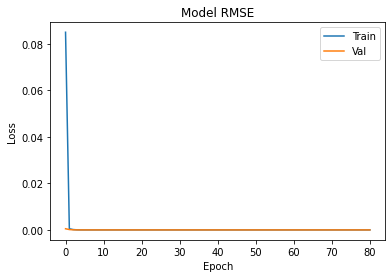

Training RMSE is
0.0
Validation RMSE is
0.0
Training loss is
0.0
Validation loss is
0.0


In [34]:
# Error Graph
from matplotlib import pyplot as plt
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
 

train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)


In [60]:

#@title Insert PubChem Fingerprint of Drug and Carrier (Oil, Surfactant, Cosurfactant)
!pip install pubchempy
import tensorflow as tf
import pandas as pd 
import numpy as np 
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd

#gdd.download_file_from_google_drive(file_id='1jWa1UK8cxcCuEX_Chs1zm4hfa_j_Q-Ki',
                                   #dest_path='/content/sample_data/HPLC_NUM.hdf5',
                                   #unzip=False)
#Load Model
model = load_model('/content/drive/My Drive/HPLC_NUM.hdf5', compile= True)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
Drug_1_CID =  2244#@param {type:"number"}
Drug_2_CID =  24872560#@param {type:"number"}
Methanol =  0#@param {type:"number"}
Methanol = Methanol/100
Acetonitrile =  40#@param {type:"number"}
Acetonitrile = Acetonitrile/100
Water =  0#@param {type:"number"}
Water = Water/100
Buffer =  60#@param {type:"number"}
Buffer = Buffer/100
pH =  4#@param {type:"number"}
pH = pH/14


Drug_1_CID = pcp.Compound.from_cid(Drug_1_CID)
Drug_2_CID = pcp.Compound.from_cid(Drug_2_CID)

FPD_1 = Drug_1_CID.cactvs_fingerprint
FPD_2 = Drug_2_CID.cactvs_fingerprint

List1 = [Methanol, Acetonitrile, Water, Buffer, pH]

List2 = list(FPD_1)
List3 = list(FPD_2)
List = List1+List2+List3
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))

dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1767].astype(float))


Y_prediction = model.predict(X_Predict)
Y_prediction = Y_prediction*50
Y_prediction = pd.DataFrame(Y_prediction)
print(Y_prediction)


1/1 [==============================] - 0s 50ms/step
     0    1
0  0.0  0.0


In [63]:
print(t)

  0    1    2    3                   4    5    6    7    8    9     ... 1757  \
0  0.0  0.4  0.0  0.6  0.2857142857142857    1    1    0    0    0  ...    0   

  1758 1759 1760 1761 1762 1763 1764 1765 1766  
0    0    0    0    0    0    0    0    0    0  

[1 rows x 1767 columns]
